# Comparative Analysis of ARIMA, ANN and SVR (4)
###### Scenario 4 (SC4) contains hourly time-steps input data of the energy consumption for electric water boilers of 67 apartment daily consumption.

### Introduction 
In this study, a comparative analysis of machine learning models was conducted for the prediction and forecasting of EWBs energy consumption, using a dataset from 67 apartments as a case study. Subsequently, the input data was categorized into five distinct scenarios, serving as inputs to ANN, SVR, and ARIMA models to simulate their prediction and forecasting capabilities, evaluated using performance metrics presented in subsequent sections.

Scenario one will be used throughout this report for implementation, while the other scenarios will remain commented in the code and can be uncommented for estimation as needed. Figure 1 illustrates the implementation of this methodology.

<center>
<figure>
  <img src="method.jpg" width="70%" height="70%">
  <figcaption><i> Figure 1: Comparative analysis methodology </i></figcaption>
</figure>
</center>

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from matplotlib.pyplot import rc
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
import time

### Loading data time steps and data structuring for model application and visualisation ####

In [8]:
# Secanrio data 

flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption data for 24 hours time-step

spring_dates = flowload_data.iloc[90:183] # spring dates 


# Prediction duration parameters 
total_time_len_day = 30 * 2   # prediction spring


length_of_predict = 30  # future prediction (forecasting) spring


# Data loading preparation
sample_data = spring_dates.iloc[:, -1] # 

datainf = flowload_data.iloc[:, -1].values  

datainf = datainf / np.max(datainf)

data_pass_to = [None, total_time_len_day, length_of_predict] # inputs

actual = datainf[:total_time_len_day + length_of_predict] # actual data


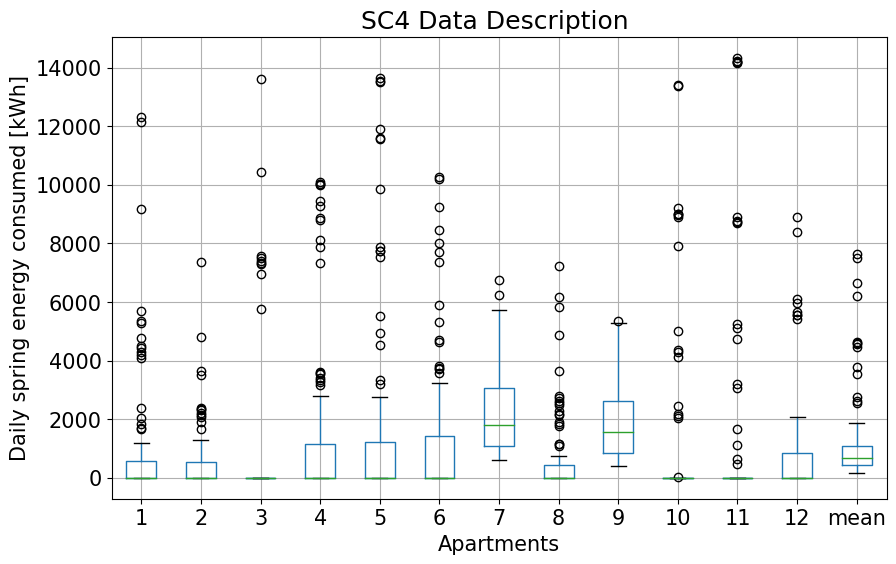

In [9]:
#  Data description visualisation plots
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("electric_onehour.csv")

df_selected = df[90:183] # training duration


# Directly rename the columns
df_selected.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean']



# visualisation 
rc('font', **{'size' : 15})
plt.figure(figsize=(10, 6)) 
df_selected.boxplot()  
plt.title('SC4 Data Description ')
#plt.xticks(rotation=45)  
plt.xlabel('Apartments')
plt.ylabel('Daily spring energy consumed [kWh]')
plt.savefig('sc4_des.jpg')
plt.show()


#### Data Description of  other 4 secanrios, 
- Scenario 2 (SC2) as represent in figure 2, scenario 3 (SC3) as figure 3, scenario 4 (SC4) as figure 4, and scenario 5 (SC5) as  figure 5 respectively. the figures shoes the data descrpition of the data input time steps and means of the energy consumption for EWBs of 67 apartments. SC1 will be used for codel implememtataion other scenarios will be commented out while, other scenario codes are commented as below.

- Scenario 2 (SC2)

<center>
<figure>
  <img src="sc2_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 2: Scenario 2 (SC2) data description </i></figcaption>
</figure>
</center>


- Scenario 3 (SC3)

<center>
<figure>
  <img src="sc3_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 3: Scenario 3 (SC3) data description </i></figcaption>
</figure>
</center>


- Scenario 4 (SC4)

<center>
<figure>
  <img src="sc4_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 4: Scenario 4 (SC4) data description </i></figcaption>
</figure>
</center>


- Scenario 5 (SC5)

<center>
<figure>
  <img src="sc5_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 6: Scenario 5 (SC5) data description </i></figcaption>
</figure>
</center>


#### ARIMA forecast and Prediction model development

In [7]:
# ARIMA forecast and Prediction model development and analysis 

#Computational time cost
start_time_arima_p = time.time()
start_time_arima_r = time.time()
def arima_process(data, nhours, predict_len):
  
   
    kndata = data[:nhours]
    ukndata = data[nhours:nhours + predictlen]

    # Fitting the ARIMA model
    model = ARIMA(kndata, order=(3, 1, 0))
    fitted_model = model.fit()
    
    #prediction
    predict = fitted_model.predict(start=1, end=total_time_len_day)
    # Forecasting
    forecast = fitted_model.forecast(steps=predictlen)
    residuals = fitted_model.resid
    

    return kndata, ukndata, predict, forecast, residuals, fitted_model


nhours = total_time_len_day
predictlen = length_of_predict
kndata, ukndata, predict, forecast, residuals, fitted_model = arima_process(datainf, nhours, predictlen)


print(fitted_model.summary())

# computation time results
end_time_arima_p = time.time()
end_time_arima_r = time.time()
process_time_arima_p = end_time_arima_p - start_time_arima_p
process_time_arima_r = end_time_arima_r - start_time_arima_r
minute_arima_p = process_time_arima_p // 60 
minute_arima_r = process_time_arima_r // 60
second_arima_p = process_time_arima_p % 60 
second_arima_r = process_time_arima_r % 60 


# Computation time visualisation 
# prediction
print('Time Spent for arima_p: ', round(minute_arima_p), 'minutes', round(second_arima_p,3), 'seconds')

# forecasting time spent
print('Time Spent for arima_r: ', round(minute_arima_r), 'minutes', round(second_arima_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, predict)
rmse_p = np.sqrt(mean_squared_error(kndata, predict))
arima_mae_p = mean_absolute_error(kndata, predict)
mse_p = mean_squared_error(kndata, predict)

# forecasting 
r2_r = r2_score(ukndata, forecast)
rmse_r = np.sqrt(mean_squared_error(ukndata, forecast))
arima_mae_r = mean_absolute_error(ukndata, forecast)
mse_r = mean_squared_error(ukndata, forecast)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", arima_mae_p, "MSE:", mse_p)

# forecasting
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", arima_mae_r, "MSE:", mse_r)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(3, 1, 0)   Log Likelihood                  58.364
Date:                Tue, 25 Mar 2025   AIC                           -108.727
Time:                        19:00:59   BIC                           -100.417
Sample:                             0   HQIC                          -105.483
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1779      0.154     -1.156      0.248      -0.480       0.124
ar.L2         -0.3747      0.191     -1.966      0.049      -0.748      -0.001
ar.L3         -0.1713      0.146     -1.173      0.2

#### SVR forecasting and prediction model development

In [5]:
## SVR forecast and Prediction model development and analysis

#Computational time cost 
start_time_svr_p = time.time()
start_time_svr_r = time.time()

### Kernel function of SVR
def funck(x, y, kernel_type):
    # Gaussian Kernel
    if kernel_type == 'g':
        sigma = 0.0005  # value subject to adjustment 
        return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return 0


### SVR model development
def svr_process(datainf, data_pass_to, past_predict_len):
    nhour1 = data_pass_to[1]
    predictlen = data_pass_to[2]
    data = datainf
    datain = []

    for kl in range(nhour1 + predictlen):
        datain.append(data[kl:kl + 2])

    datain = np.array(datain) 
    
    datax = datain[:, :-1]
    datay = datain[:, -1]
    totlpt = len(datain)
    alpha = np.zeros(totlpt)
    norm1 = 10e2
    errortol = 0.2
    itercnt = 0
    maxiter = 10e2
    eps = 0.1

    while norm1 > errortol and itercnt < maxiter:
        alpha_old = alpha.copy()
        alpha_ = alpha.copy()

        for indxd in range(totlpt):
            gx = np.array([funck(datax[x], datax[indxd], 'g') for x in range(len(datax))])
            alpha[indxd] = alpha[indxd] + datay[indxd] - eps * np.sign(alpha[indxd]) - np.dot(alpha, gx)

            if alpha_[indxd] * alpha[indxd] < 0:
                alpha[indxd] = 0

        norm1 = np.linalg.norm(alpha_old - alpha)
        itercnt += 1

  

    outdata = np.array([alpha[indx2] * np.array([funck(datax[x], datax[indx2], 'g') for x in range(len(datax))]) for indx2 in range(totlpt)])
    outdataf = np.sum(outdata, axis=0)

    # Handle outdataf for non-array cases
    if not isinstance(outdataf, np.ndarray):
        outdataf = np.array([outdataf])

    # predictions
    past_predictions = outdataf[past_predict_len:nhour1] if past_predict_len < nhour1 else np.array([])
    

    # Future predictions (forecasting)
    resout = outdataf[nhour1:nhour1 + predictlen] if len(outdataf) > nhour1 else np.array([])

    kndata = datay[:nhour1]
    ukndata = datay[nhour1:nhour1 + predictlen]
    SVR_MSE = np.mean((ukndata - resout) ** 2) if resout.size > 0 else np.nan
    

    return kndata, ukndata, past_predictions, resout, SVR_MSE

# prediction parameters
past_predict_len = 0  # Number of hours in the past for which predictions are made
kndata, ukndata, past_predictions, resout, svr_mse = svr_process(datainf, data_pass_to, past_predict_len)

# computation time results
end_time_svr_p = time.time()
end_time_svr_r = time.time()
process_time_svr_p = end_time_svr_p - start_time_svr_p
process_time_svr_r = end_time_svr_r - start_time_svr_r
minute_svr_p = process_time_svr_p // 60 
minute_svr_r = process_time_svr_r // 60
second_svr_p = process_time_svr_p % 60 
second_svr_r = process_time_svr_r % 60 


# Computation time visualisation 
# print prediction time
print('Time Spent for svr_p: ', round(minute_svr_p), 'minutes', round(second_svr_p,3), 'seconds')

# print forecasting time.
print('Time Spent for svr_r: ', round(minute_svr_r), 'minutes', round(second_svr_r,3), 'seconds')


# Performance Metrics Evaluation for Prediction
# predictions
r2_p = r2_score(kndata, past_predictions)
rmse_p = np.sqrt(mean_squared_error(kndata, past_predictions))
svr_mae_p = mean_absolute_error(kndata, past_predictions)
mse_p = mean_squared_error(kndata, past_predictions)

## Computation time visualisation 
# forecast
r2_r = r2_score(ukndata, resout)
rmse_r = np.sqrt(mean_squared_error(ukndata, resout))
svr_mae_r = mean_absolute_error(ukndata, resout)
mse_r = mean_squared_error(ukndata, resout)


# prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", svr_mae_p, "MSE:", mse_p)

# forecasting 
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", svr_mae_r, "MSE:", mse_r)


Time Spent for svr_p:  0 minutes 0.307 seconds
Time Spent for svr_r:  0 minutes 0.307 seconds
prediction - R2 Score: -0.26763021247214547 RMSE: 0.09637190540141281 MAE: 0.09449615529170682 MSE: 0.00928754415069886
forecast - R2 Score: -0.1332754295865255 RMSE: 0.09845168118864017 MAE: 0.09830327354557812 MSE: 0.009692733528869646


####  ANN Model Development

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.5279 - mse: 0.5279 - val_loss: 0.4085 - val_mse: 0.4085
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4173 - mse: 0.4173 - val_loss: 0.3102 - val_mse: 0.3102
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3194 - mse: 0.3194 - val_loss: 0.2208 - val_mse: 0.2208
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2194 - mse: 0.2194 - val_loss: 0.1439 - val_mse: 0.1439
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1399 - mse: 0.1399 - val_loss: 0.0797 - val_mse: 0.0797
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0764 - mse: 0.0764 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - mse: 0.0014 -

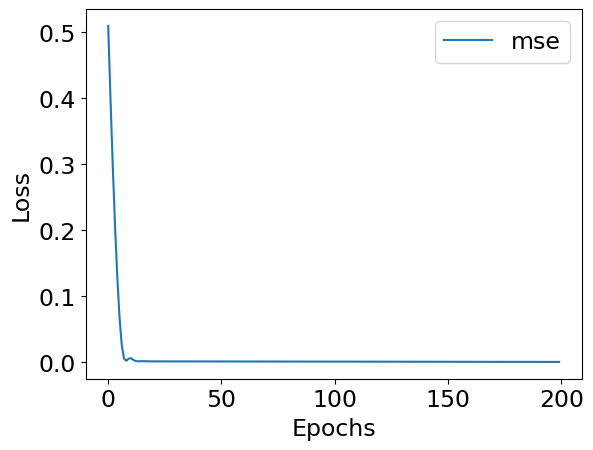

Time Spent for ann_p:  0 minutes 14.159 seconds
Time Spent for ann_r:  0 minutes 14.159 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Data - R2 Score: 0.9900601762117744 RMSE: 0.008745486551988781 MAE: 0.0068207232805975035 MSE: 7.648353503101661e-05
Test Data - R2 Score: 0.9894772450593461 RMSE: 0.012167620656427914 MAE: 0.007211202406191352 MSE: 0.0001480509924387313


In [13]:
### Training data

split_size = int(0.8 * len(flowload_data))

train_data = datainf[:split_size]
test_data = datainf[split_size:]

#### from slipt above training data 

split_size = int(0.8 * len(flowload_data))


train_data = datainf[:split_size]
test_data = datainf[split_size:]


#Computational time cost 
start_time_ann_p = time.time()
start_time_ann_r = time.time()


def ann_model(): 
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.Dense(1, activation='sigmoid') # 
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse']) 
    
    history = model.fit(
        train_data, train_data,  
        epochs=200,  
        validation_data=(test_data, test_data),  # Validation set
        verbose=1
    )
    
    return model, history

    

model, history = ann_model() 


pred = model.predict(datainf)
df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


#Computational cost end time
end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 

# print prediction time
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

# print forecasting time
print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')


# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()


# Performance Metrics Evaluation for Prediction
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

# Performance Metrics Evaluation for forecasting
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


# Print out Prediction metrics
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)

# Print out forecasting metrics
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



#### ARIMA Plots

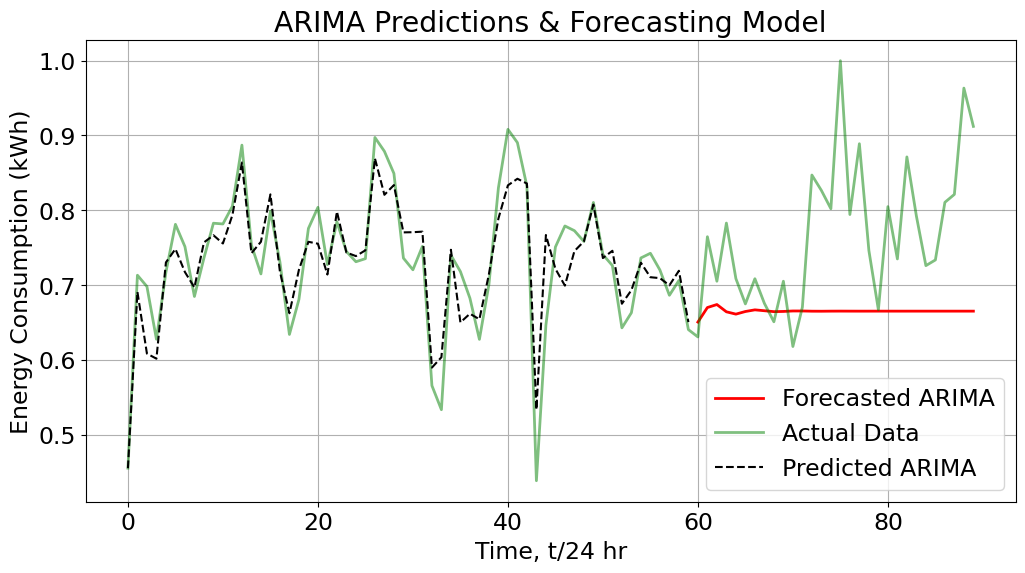

In [7]:
# Plotting All Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'r', label='Forecasted ARIMA', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.5, linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'black', label='Predicted ARIMA', linestyle='--')
plt.title('ARIMA Predictions & Forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc4_arima.jpg')
plt.show()

#### SVR plots

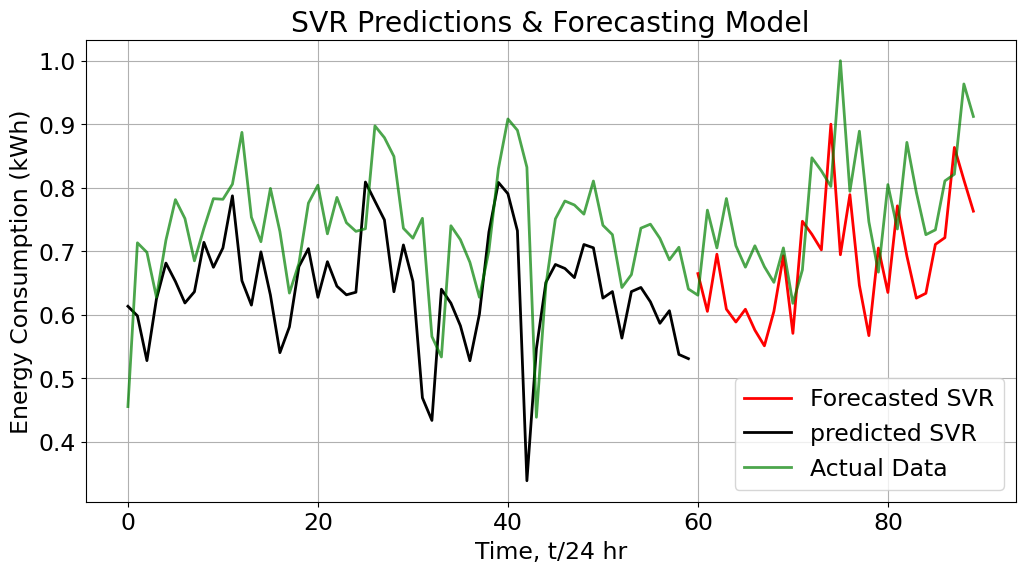

In [8]:
# Plotting
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', label='Forecasted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day)), past_predictions, 'black', label='predicted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.7, linewidth=2)
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('SVR Predictions & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc4_svr.jpg')
plt.show()

#### ANN Model

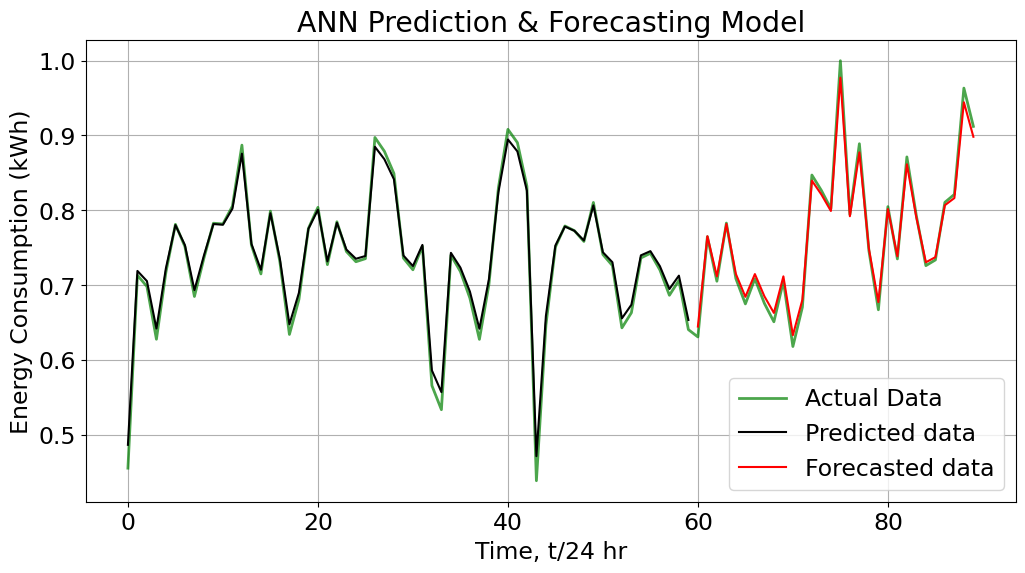

In [14]:
# Plotting Trained, Prediction & Forecast
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.7, linewidth=2)
plt.plot(range(0, total_time_len_day), pred[:total_time_len_day], 'black', linestyle='-', label='Predicted data')
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'r', label='Forecasted data')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ANN Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc4_ann.jpg')
plt.show()

### Combined ARIMA, ANN & SVR predictions

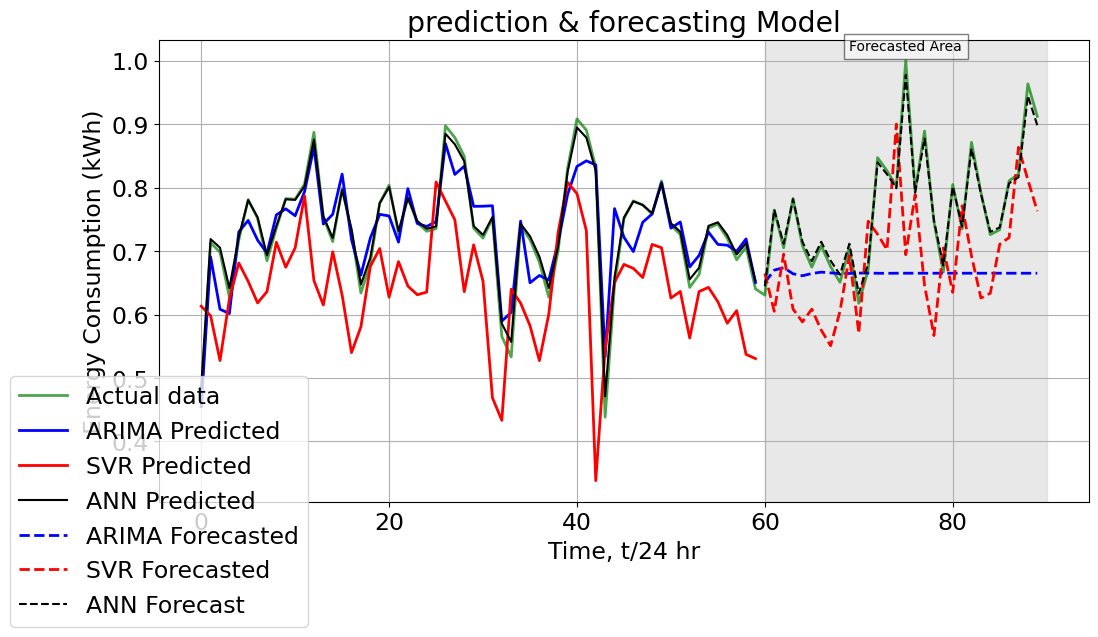

In [16]:
# Plotting All Results
# Plotting All Results predictions
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
#plt.plot(range(len(datainf[:total_time_len_day])), datainf[:total_time_len_day], 'g', label='Actual data', linestyle='--')
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
# prediction plots
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')
#forecasting plots
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'blue', linestyle='--', label='ARIMA Forecasted', linewidth=2)
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', linestyle='--', label='SVR Forecasted', linewidth=2)
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', linestyle='--', label='ANN Forecast')
plt.axvspan(total_time_len_day, total_time_len_day + length_of_predict, color='lightgray', alpha=0.5)
x_position = total_time_len_day + (length_of_predict / 2) 
y_position = plt.ylim()[1]  
plt.text(x_position, y_position, 'Forecasted Area', ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('prediction & forecasting Model')
plt.xlabel('Time, t/24 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend(loc='center', bbox_to_anchor = (0, 0))
plt.grid(True)
#plt.savefig('sc4_pf.jpg')
plt.show()


In [17]:
# Plotting All Results
#plt.figure(figsize=(12, 6))
#plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', label='ANN Forecasted')
#plt.plot(forecast_data.index[total_time_len_day:total_time_len_day + length_of_predict], forecast, 'b', label='Forecast ARIMA', linewidth=2)
#plt.plot(range(total_time_len_day, total_time_len_day + length_of_predict), resout, 'r', label='Forecasted SVR', linewidth=2)
#plt.plot(range(total_time_len_day, total_time_len_day + length_of_predict), actual, 'g', label='Forecasted SVR', linewidth=2)
#plt.title('EWB Hot Water')
#plt.xlabel('Time (Hour)')
#plt.ylabel('Hot water Consumed (flowrate)')
#plt.legend()
#plt.grid(True)
#plt.show()
